<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/010_Lambda_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 10: Lambda Layer

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.5.0


In [3]:
import os
def loadThumb(path):
  # Let's import this video thumbnail!
  if os.path.exists(path):
    myThumb = plt.imread(path)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.axis('off')
    ax.imshow(myThumb)
    plt.show()

loadThumb('/tmp/yt_thumb_010.png')


#### Video Topics
> 1. Load the fashion MNIST dataset
> 2. Create a model with the keras API with a lambda layer for normalization
> 3. Train the model and check the results
> 4. See you on next video! 

# Load the dataset
___

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
def plot_my_image(image):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def plot_images(images):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[train_labels[i]])
  plt.show()

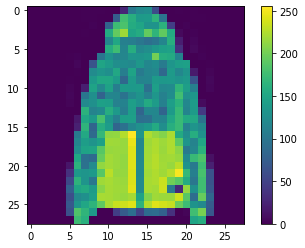

In [7]:
plot_my_image(train_images[22])

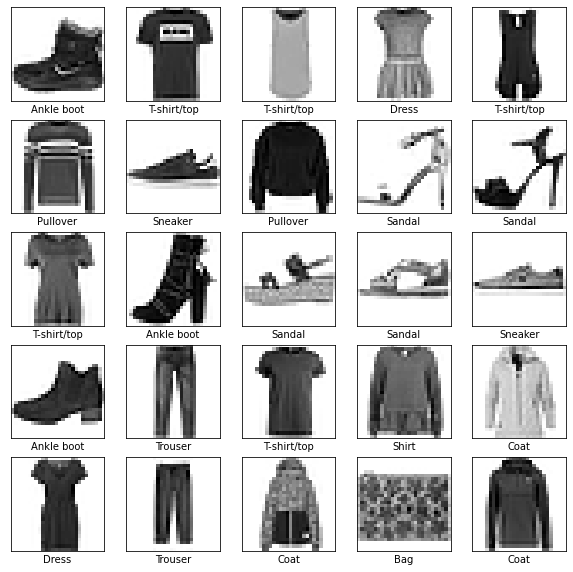

In [8]:
plot_images(train_images)

# Create the model
___

In [9]:
from tensorflow.keras.layers import Dense, Input, Lambda, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer

In [10]:
print(f'Images Shape: {train_images[0].shape}')
print(f'Num. of classes: {len(set(train_labels))}')

Images Shape: (28, 28)
Num. of classes: 10


In [11]:
input_data = Input(shape=(train_images[0].shape), name='Input')
normalization = Lambda(lambda x: x / 255.0)(input_data)
flatten = Flatten()(normalization)
dense = Dense(64, activation='relu')(flatten)
output = Dense(len(set(train_labels)), name='output', activation='softmax')(dense)
model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


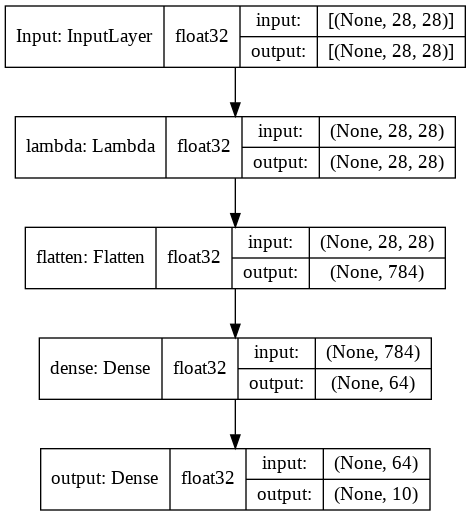

In [12]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

# Train and check the results
___

In [13]:
model.layers

In [14]:
history = model.fit(
    train_images,
    train_labels,
    batch_size = 256,
    epochs=40,
    validation_data=(test_images,
                     test_labels))

Epoch 1/40
235/235 [==============================] - 2s 4ms/step - loss: 0.6517 - accuracy: 0.7834 - val_loss: 0.5075 - val_accuracy: 0.8251
Epoch 2/40
235/235 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.8452 - val_loss: 0.4578 - val_accuracy: 0.8399
Epoch 3/40
235/235 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8577 - val_loss: 0.4369 - val_accuracy: 0.8489
Epoch 4/40
235/235 [==============================] - 1s 3ms/step - loss: 0.3861 - accuracy: 0.8648 - val_loss: 0.4288 - val_accuracy: 0.8496
Epoch 5/40
235/235 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.8719 - val_loss: 0.3989 - val_accuracy: 0.8638
Epoch 6/40
235/235 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.8757 - val_loss: 0.3897 - val_accuracy: 0.8654
Epoch 7/40
235/235 [==============================] - 1s 4ms/step - loss: 0.3418 - accuracy: 0.8784 - val_loss: 0.3861 - val_accuracy: 0.8646
Epoch 

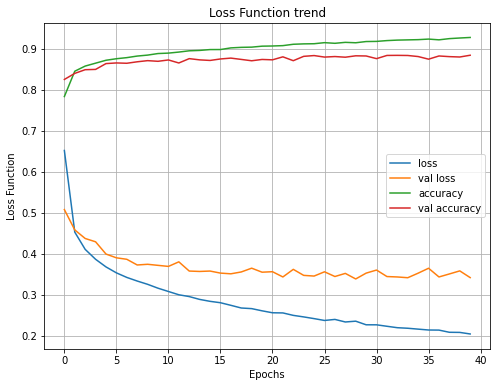

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss, label='loss')
plt.plot(val_loss, label = 'val loss')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.grid('both')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.legend()
plt.show()

In [16]:
input_data = Input(shape=(*train_images[0].shape,), name='Input')
normalization = Lambda(lambda x: x / 255.0)(input_data)
expand = Lambda(lambda x: tf.expand_dims(x, -1))(normalization)
conv_1 = Conv2D(16, (3, 3), activation='relu')(expand)
max_pool_1 = MaxPool2D(2, 2)(conv_1)
conv_2 = Conv2D(16, (3, 3), activation='relu')(max_pool_1)
max_pool_2 = MaxPool2D(2, 2)(conv_2)
flatten = Flatten()(max_pool_2)
output = Dense(len(set(train_labels)), name='output', activation='softmax')(flatten)
model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 28, 28)            0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0   

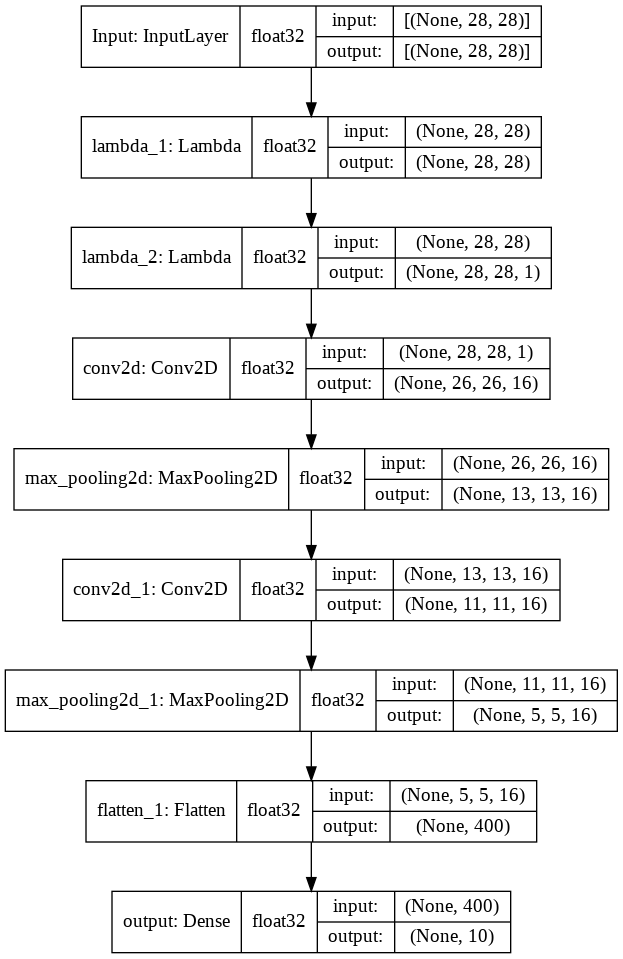

In [17]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [18]:
history = model.fit(
    train_images,
    train_labels,
    batch_size = 256,
    epochs=40,
    validation_data=(test_images,
                     test_labels))

Epoch 1/40
235/235 [==============================] - 4s 10ms/step - loss: 0.8890 - accuracy: 0.6932 - val_loss: 0.5672 - val_accuracy: 0.7908
Epoch 2/40
235/235 [==============================] - 2s 7ms/step - loss: 0.5040 - accuracy: 0.8173 - val_loss: 0.4871 - val_accuracy: 0.8240
Epoch 3/40
235/235 [==============================] - 2s 7ms/step - loss: 0.4490 - accuracy: 0.8399 - val_loss: 0.4571 - val_accuracy: 0.8370
Epoch 4/40
235/235 [==============================] - 2s 7ms/step - loss: 0.4208 - accuracy: 0.8507 - val_loss: 0.4296 - val_accuracy: 0.8482
Epoch 5/40
235/235 [==============================] - 2s 7ms/step - loss: 0.4000 - accuracy: 0.8587 - val_loss: 0.4145 - val_accuracy: 0.8525
Epoch 6/40
235/235 [==============================] - 2s 7ms/step - loss: 0.3864 - accuracy: 0.8623 - val_loss: 0.4063 - val_accuracy: 0.8593
Epoch 7/40
235/235 [==============================] - 2s 7ms/step - loss: 0.3733 - accuracy: 0.8679 - val_loss: 0.3964 - val_accuracy: 0.8577
Epoch

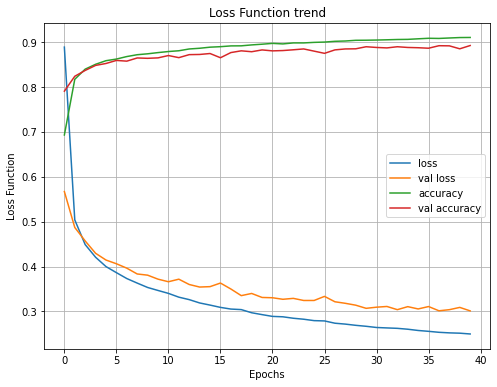

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss, label='loss')
plt.plot(val_loss, label = 'val loss')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.grid('both')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.legend()
plt.show()


In [20]:
model.predict((tf.expand_dims(train_images[0], axis=0)))

array([[4.2388075e-09, 7.6894186e-14, 1.3954894e-10, 4.6744519e-09,
        4.3519264e-09, 1.2075995e-05, 8.9961304e-08, 2.5105920e-02,
        2.8570553e-06, 9.7487903e-01]], dtype=float32)

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

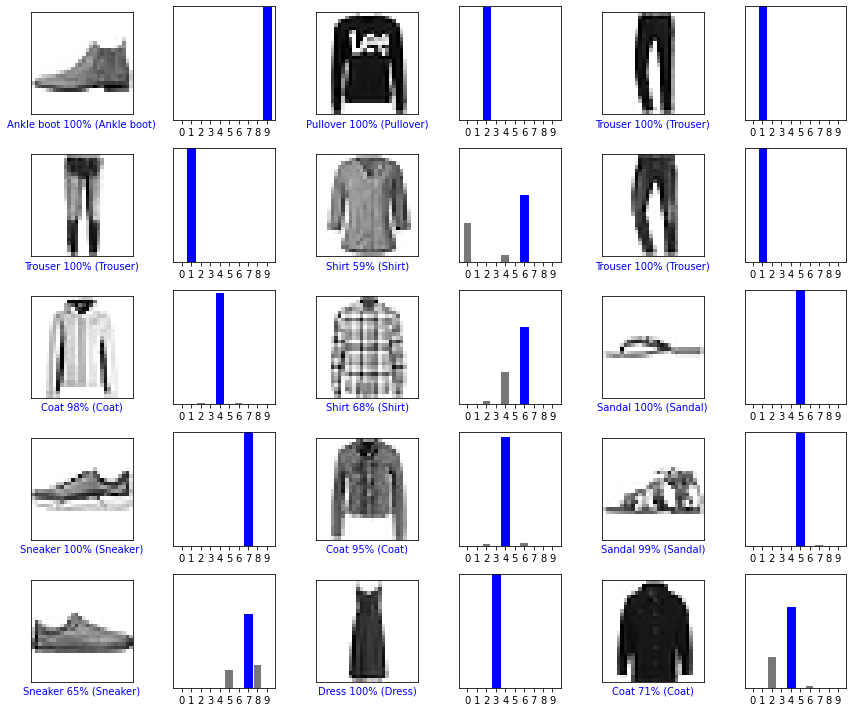

In [22]:
import numpy as np
predictions = model.predict(test_images)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Greetings
---

In [23]:
!pip install art
from art import tprint, aprint
tprint('See you on next videos!')
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)
subscribe()

 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 
